# SVM Kernels Indepth Intuition and Practical Explanation

In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [93]:
x =np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])


In [94]:
x1= np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2 -x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

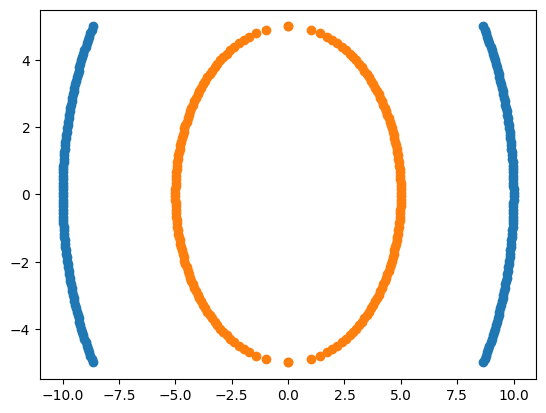

In [95]:
plt.scatter(y,x)
plt.scatter(y1,x1)


In [96]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2']) ## .T means transpose of the matrix 
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df=pd.concat([df1,df2])
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [97]:
### Independant and Dependant features 
X=df.iloc[:,:2]
Y=df.Y

In [98]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.30,random_state=10)

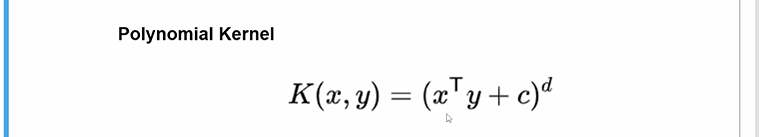

In [100]:
## we need to find components for the polynomial kernel
# X1,X2,X1_square , X1*X2
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1_X2'] = df['X1'] * df['X2']


df.head()

,X1,X2,Y,X1_square,X2_square,X1_X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [101]:
X=df[['X1','X2','X1_square','X2_square','X1*X2']]
y=df['Y']

KeyError: "['X1*X2'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN ,Y_TEST=train_test_split(X,y,test_size=0.30,random_state=10)
X_TRAIN

,X1,X2,X1_square,X2_square,X1*X2
199,-0.000000,-5.000000,0.000000,25.000000,0.000000
25,9.688943,-2.474747,93.875625,6.124375,-23.977688
79,4.015072,2.979798,16.120804,8.879196,11.964104
60,4.886217,1.060606,23.875115,1.124885,5.182351
130,-9.804096,1.969697,96.120294,3.879706,-19.311098
...,...,...,...,...,...
169,-4.595682,-1.969697,21.120294,3.879706,9.052101
120,-4.015072,2.979798,16.120804,8.879196,-11.964104
15,9.373144,-3.484848,87.855831,12.144169,-32.663987
125,-9.688943,2.474747,93.875625,6.124375,-23.977688


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1_X2', color='Y')

fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'X1=%{x}<br>X2=%{y}<br>X1_X2=%{z}<br>Y=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('6y830QxSIUBFUglwgm8hQOSR0jEujC' ... 'LdsYL2v/sYuQKV/++/AAAAAAAAAIA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAFMBDYt7OkJgTwIbEvJ0hMR' ... 'ydITETwERi3s6QmBPAAAAAAAAAFMA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('5vuEBZCmRcA8YDcJrFpFwNB0wAZZDE' ... 'vDUgAbQOsQZUpPmBNAAAAAAAAAAAA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Y'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1'}},
                         'yaxis': {'title': {'text': 'X2'}},
                         'zaxis': {'title': {'text': 'X1_X2'}}},
               'template': '...'}
})

In [ ]:
fig2 = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1_X2', color='Y')

fig2

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('X1_square=%{x}<br>X2_square=%{' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AQAAAADAUkDQrw1U/v9SQBS6zFKuPl' ... '6zlKv/P8Dn1wYq/+8/AAAAAAAAAAA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAOUDAQMmvBgA4QLAXzbRGBT' ... '20RgU3QMJAya8GADhAAAAAAAAAOUA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('5vuEBZCmRcA8YDcJrFpFwNB0wAZZDE' ... 'vDUgAbQOsQZUpPmBNAAAAAAAAAAAA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Y'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1_square'}},
                         'yaxis': {'title': {'text': 'X2_square'}},
                         'zaxis': {'title': {'text': 'X1_X2'}}},
               'template': '...'}
})

# Direct use of poly in kernel where we have describe the kernel poly effect above how it is calculated in it 

In [103]:
## all i know to do is only the creating  hyper plane within this graph and dataset 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Classifier = SVC(kernel='poly') 
Classifier.fit(X_TRAIN,Y_TRAIN)
y_pred=Classifier.predict(X_TEST)
accuracy_score(Y_TEST,y_pred)


0.6333333333333333

### RBF kernel 
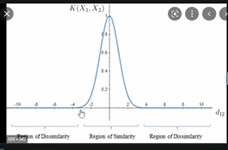  
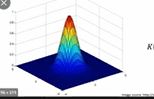
  Below sigmoid ---->

In [104]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Classifier = SVC(kernel='sigmoid') 
Classifier.fit(X_TRAIN,Y_TRAIN)
y_pred=Classifier.predict(X_TEST)
accuracy_score(Y_TEST,y_pred)


0.5333333333333333

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Classifier = SVC(kernel='rbf') 
Classifier.fit(X_TRAIN,Y_TRAIN)
y_pred=Classifier.predict(X_TEST)
accuracy_score(Y_TEST,y_pred)




1.0